In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

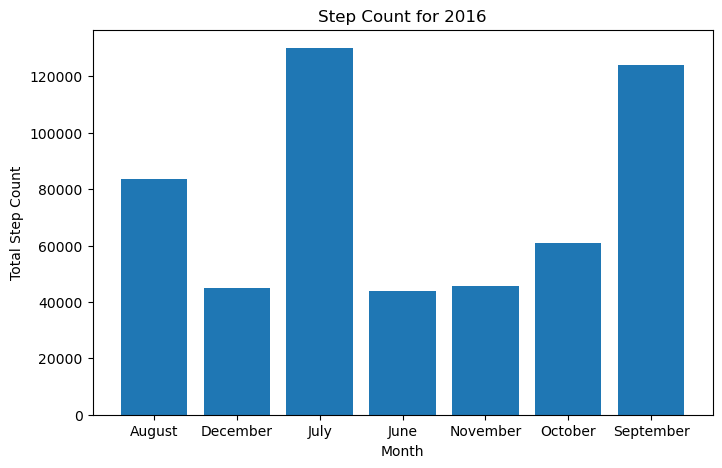

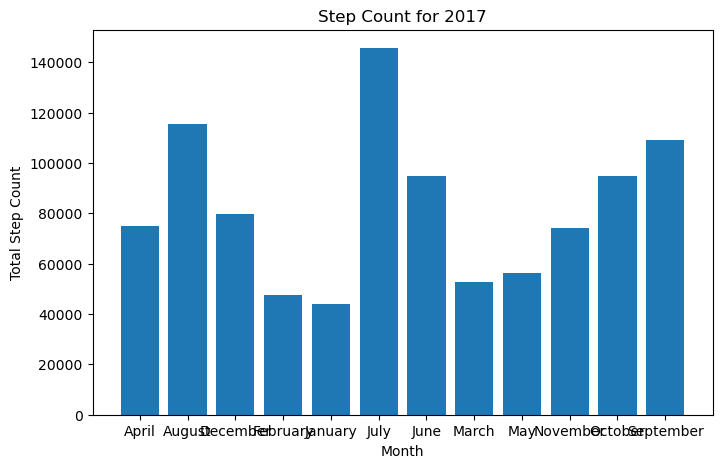

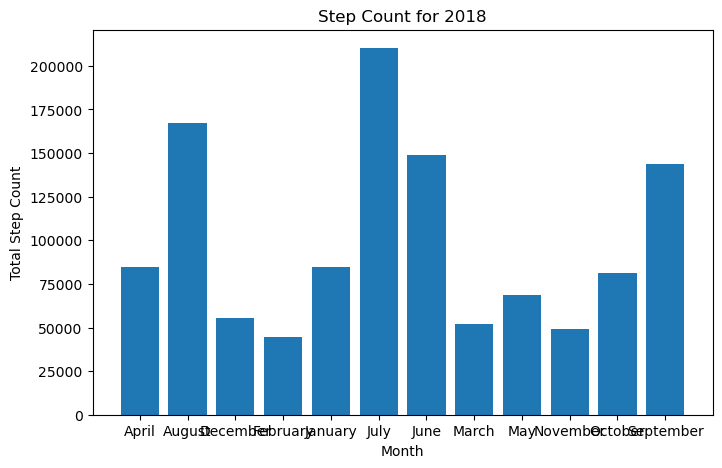

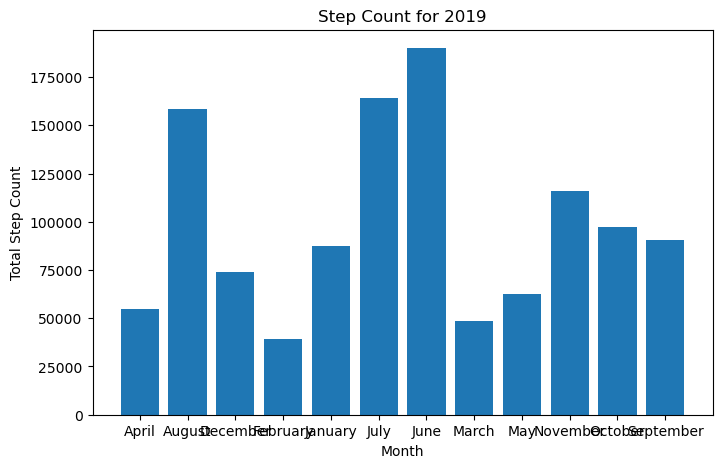

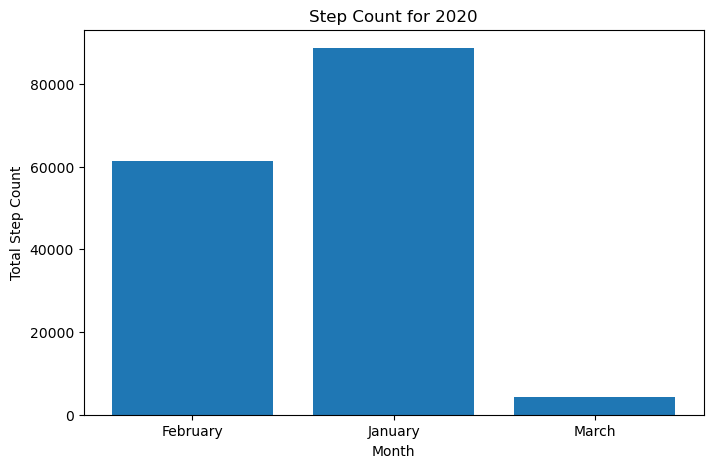

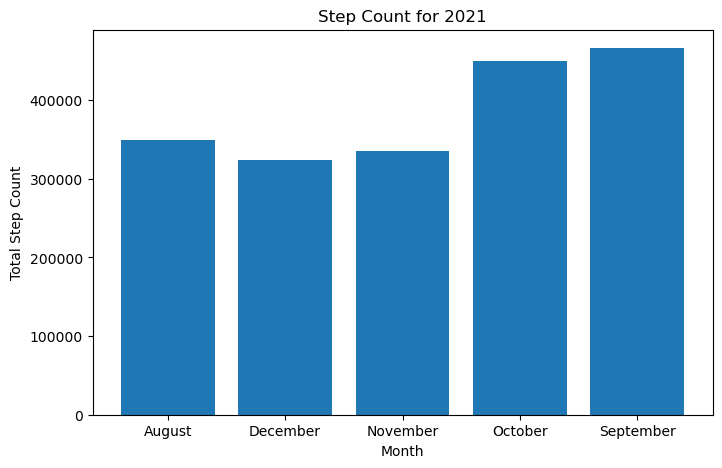

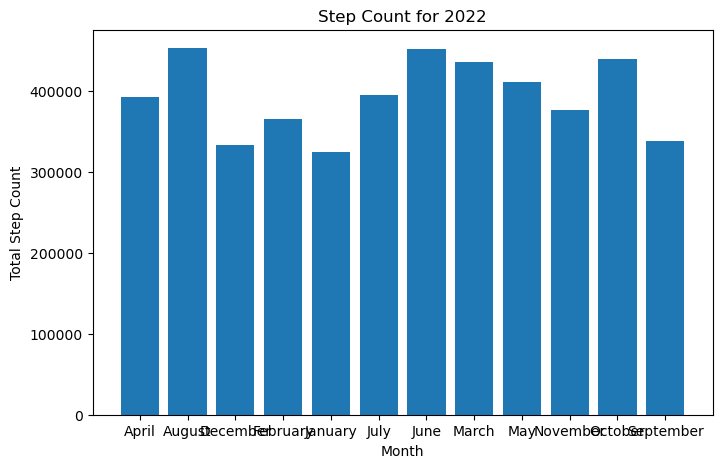

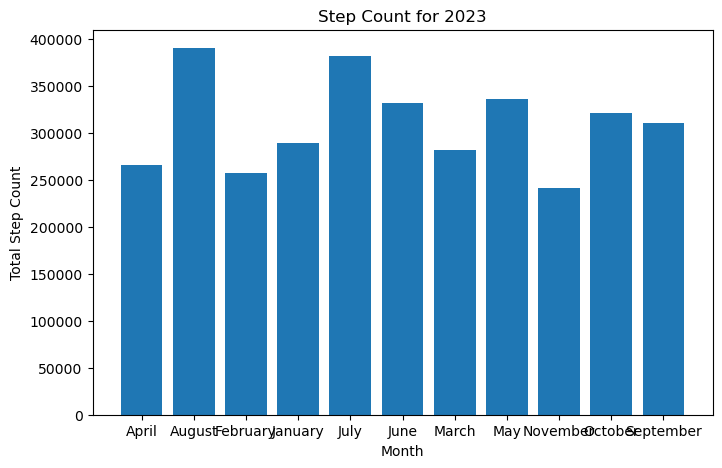

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a file named 'stepcount.csv'
file_path = 'stepcount.csv'

# Read the CSV file with appropriate data types and low_memory=False
df = pd.read_csv(file_path, header=1, usecols=[5, 6, 7, 8])

df['startDate'] = pd.to_datetime(df['startDate'])

# Extract year and month from 'startDate'
df['Year'] = df['startDate'].dt.year
df['Month'] = df['startDate'].dt.month_name()

# Group data by year and month, and sum the values
grouped_data = df.groupby(['Year', 'Month'])['value'].sum().reset_index()

# Plotting separate graphs for each year
for year, group in grouped_data.groupby('Year'):
    plt.figure(figsize=(8, 5))
    plt.bar(group['Month'], group['value'])
    plt.title(f'Step Count for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Step Count')
    plt.show()


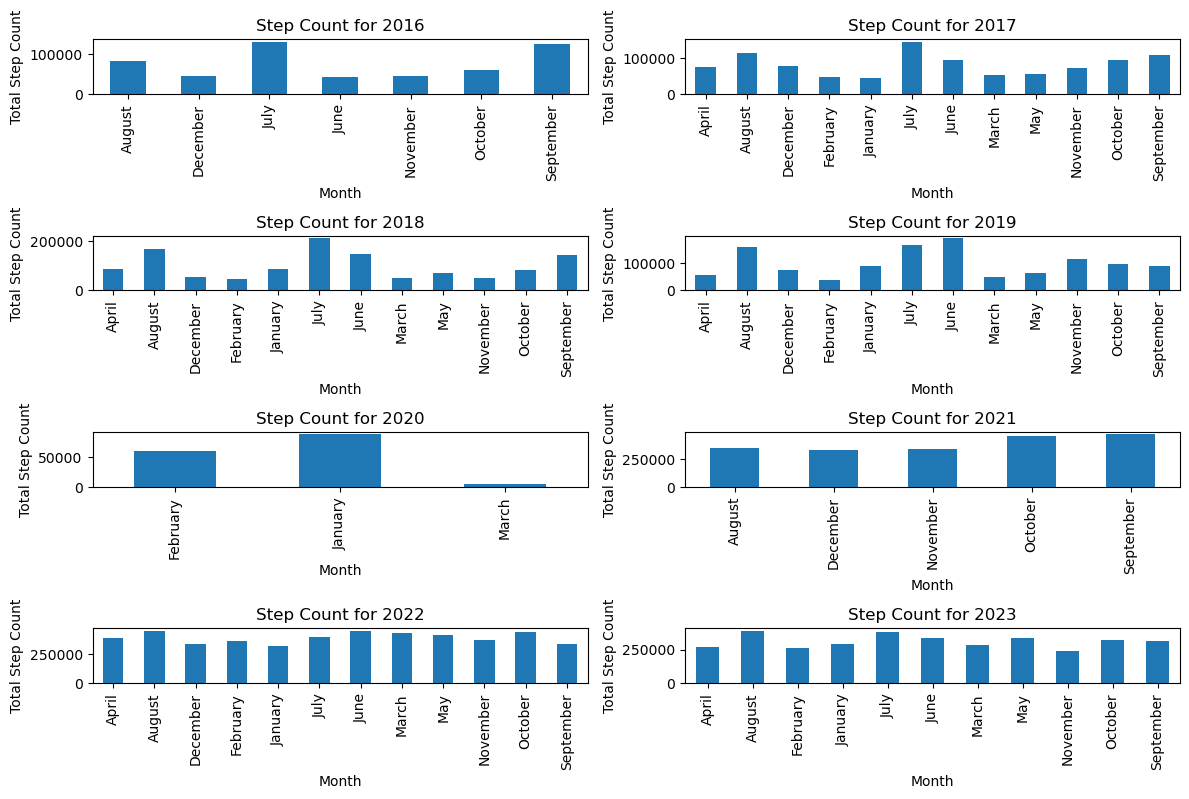

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a file named 'stepcount.csv'
file_path = 'stepcount.csv'

# Read the CSV file with appropriate data types and low_memory=False
df = pd.read_csv(file_path, header=1, usecols=[5, 6, 7, 8])

df['startDate'] = pd.to_datetime(df['startDate'])

# Extract year and month from 'startDate'
df['Year'] = df['startDate'].dt.year
df['Month'] = df['startDate'].dt.month_name()

# Group data by year and month, and sum the values
grouped_data = df.groupby(['Year', 'Month'])['value'].sum().reset_index()

# Plotting all graphs in a grid format
unique_years = sorted(grouped_data['Year'].unique())
num_rows = len(unique_years) // 2 + len(unique_years) % 2  # Ensure at least 2 rows
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for i, (year, group) in enumerate(grouped_data.groupby('Year')):
    ax = axes[i // num_cols, i % num_cols]
    group.plot(x='Month', y='value', kind='bar', ax=ax, legend=False)
    ax.set_title(f'Step Count for {year}')
    ax.set_ylabel('Total Step Count')

# Hide empty subplots
for i in range(len(unique_years), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


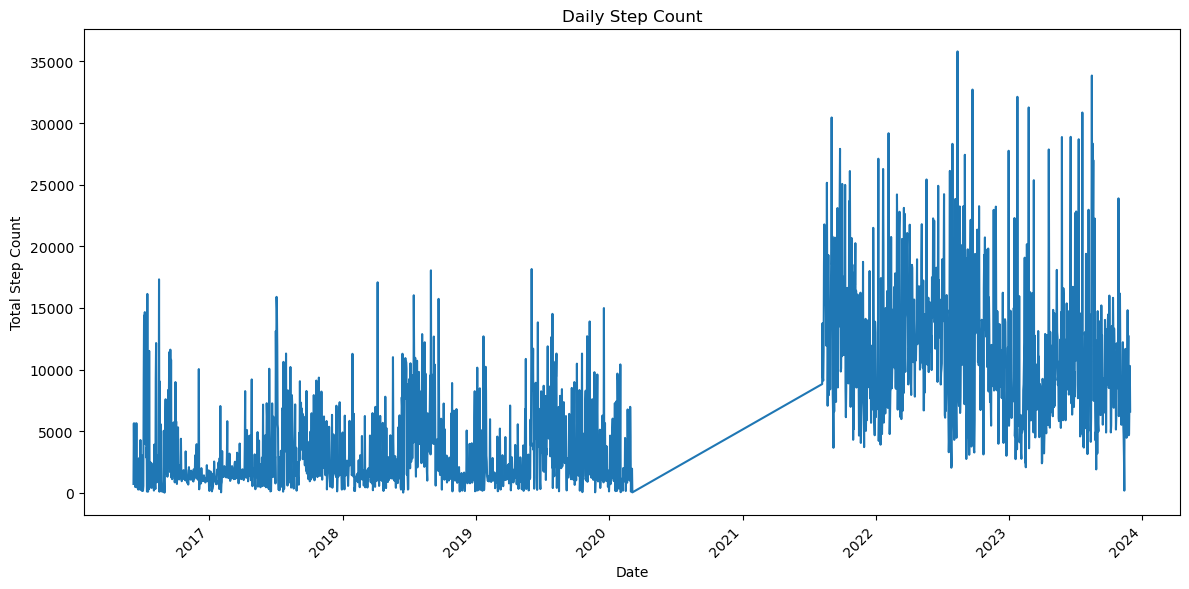

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a file named 'stepcount.csv'
file_path = 'stepcount.csv'

# Read the CSV file with appropriate data types and low_memory=False
df = pd.read_csv(file_path, header=1, usecols=[5, 6, 7, 8])

df['startDate'] = pd.to_datetime(df['startDate'])
df['date'] = df['startDate'].dt.date  # Extracting the date

# Group data by date and sum the values
grouped_data = df.groupby('date')['value'].sum().reset_index()

# Plotting a line graph with fewer markers
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['date'], grouped_data['value'], linestyle='-')
plt.title('Daily Step Count')
plt.xlabel('Date')
plt.ylabel('Total Step Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


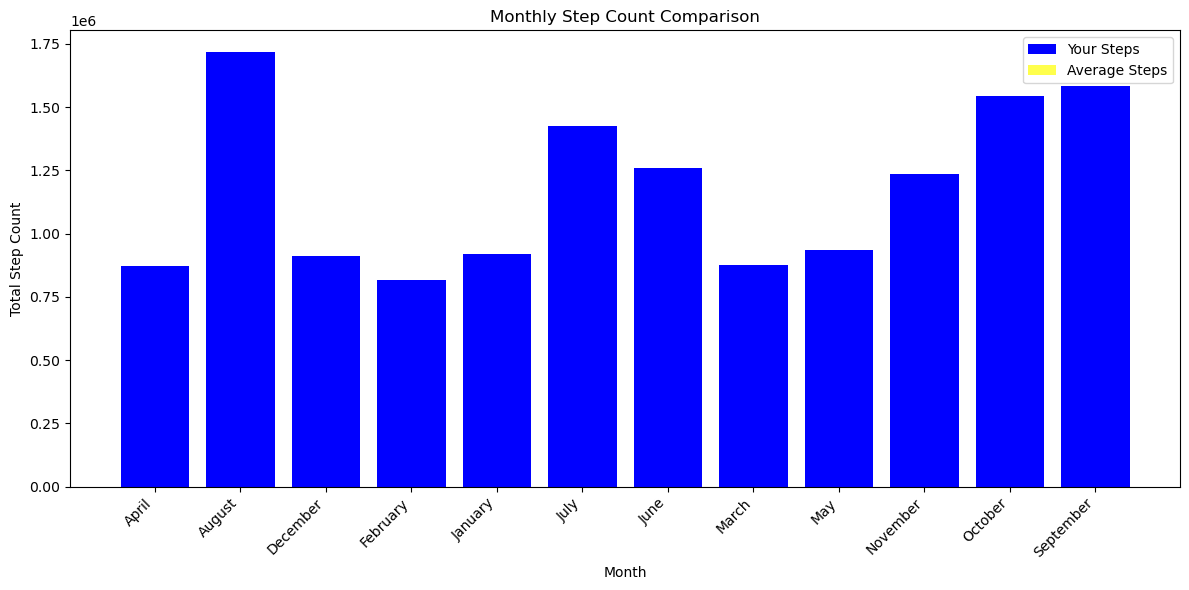

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a file named 'stepcount.csv'
file_path = 'stepcount.csv'

# Read the CSV file with appropriate data types and low_memory=False
df = pd.read_csv(file_path, header=1, usecols=[5, 6, 7, 8])

df['startDate'] = pd.to_datetime(df['startDate'])
df['Month'] = df['startDate'].dt.month_name()

# Calculate average step count for the entire dataset
average_steps_total = df['value'].mean()

# Group data by month and sum the values
grouped_data = df.groupby('Month')['value'].sum().reset_index()

# Plotting a bar graph with average step count on top
plt.figure(figsize=(12, 6))

# Plot your steps
plt.bar(grouped_data['Month'], grouped_data['value'], color='blue', label='Your Steps')

# Plot average steps as a yellow bar on top
plt.bar(grouped_data['Month'], [average_steps_total] * len(grouped_data), color='yellow', label='Average Steps', alpha=0.7)

plt.title('Monthly Step Count Comparison')
plt.xlabel('Month')
plt.ylabel('Total Step Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


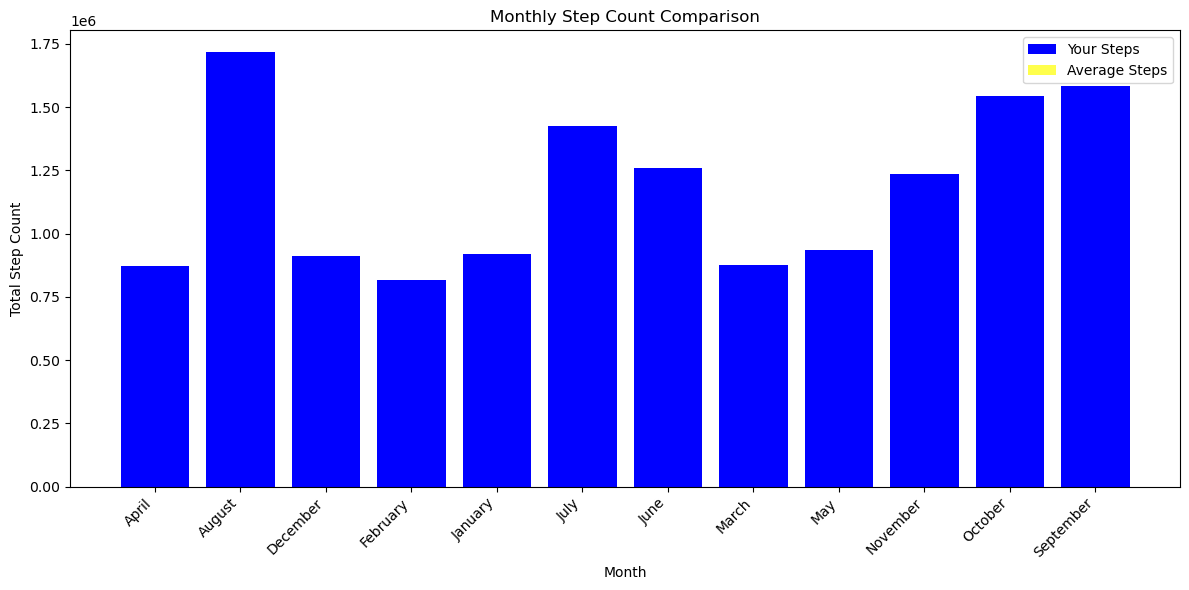

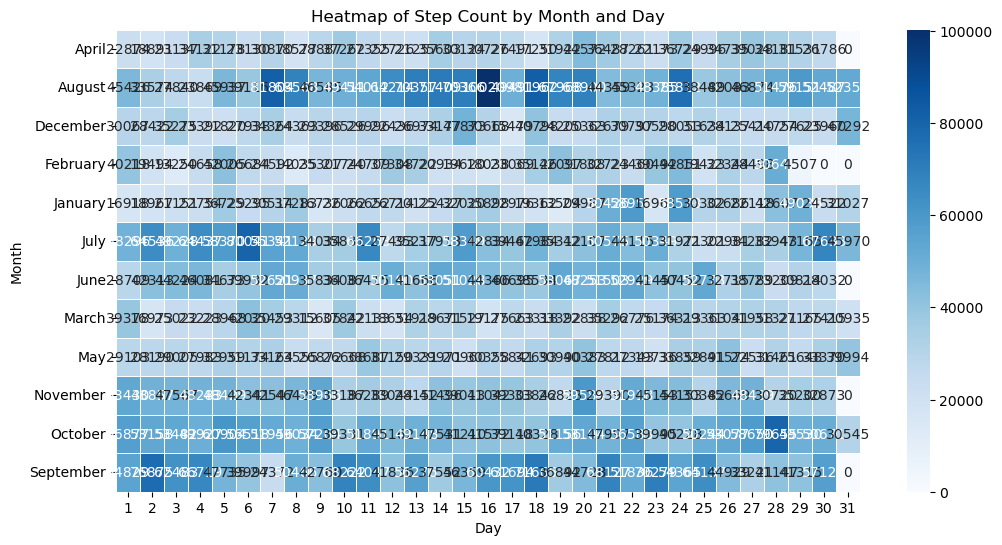

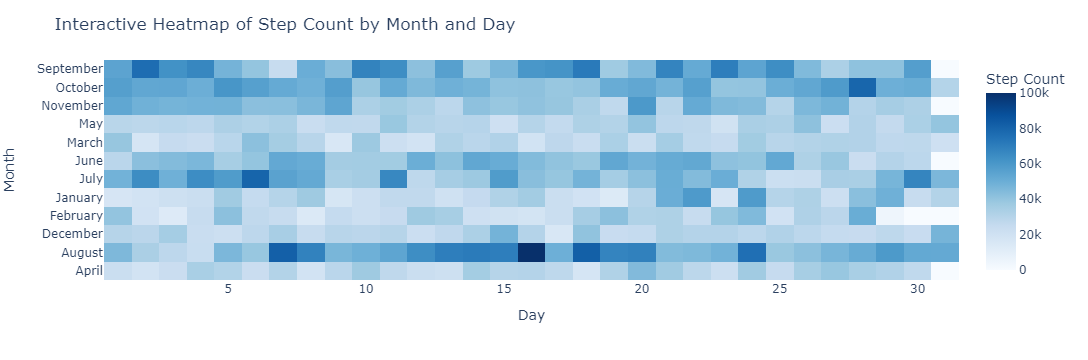

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Assuming your data is in a file named 'stepcount.csv'
file_path = 'stepcount.csv'

# Read the CSV file with appropriate data types and low_memory=False
df = pd.read_csv(file_path, header=1, usecols=[5, 6, 7, 8])

df['startDate'] = pd.to_datetime(df['startDate'])
df['Month'] = df['startDate'].dt.month_name()

# Calculate average step count for the entire dataset
average_steps_total = df['value'].mean()

# Group data by month and sum the values
grouped_data = df.groupby('Month')['value'].sum().reset_index()

# Plotting a bar graph with average step count on top using seaborn
plt.figure(figsize=(12, 6))

# Plot your steps
plt.bar(grouped_data['Month'], grouped_data['value'], color='blue', label='Your Steps')

# Plot average steps as a yellow bar on top
plt.bar(grouped_data['Month'], [average_steps_total] * len(grouped_data), color='yellow', label='Average Steps', alpha=0.7)

plt.title('Monthly Step Count Comparison')
plt.xlabel('Month')
plt.ylabel('Total Step Count')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Creating a heatmap using seaborn
heatmap_data = df.pivot_table(index='Month', columns=df['startDate'].dt.day, values='value', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Step Count by Month and Day')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()

# Creating an interactive heatmap using Plotly
fig = px.imshow(heatmap_data.values,
                labels=dict(x="Day", y="Month", color="Step Count"),
                x=heatmap_data.columns,
                y=heatmap_data.index,
                color_continuous_scale='Blues',
                origin='lower')

fig.update_layout(title='Interactive Heatmap of Step Count by Month and Day',
                  xaxis=dict(title='Day'),
                  yaxis=dict(title='Month'))
fig.write_html('interactive_plot.html')
fig.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Assuming your data is in a file named 'stepcount.csv'
file_path = 'headphones.csv'

# Read the CSV file with appropriate data types and low_memory=False
head_df = pd.read_csv(file_path, header=1, usecols=[5, 6, 7, 8])
display(head_df)

startDate                    endDate           value  \
0   2021-09-08 15:01:04 +0000  2021-09-15 15:03:49 +0000  momentaryLimit   
1   2021-10-02 06:37:53 +0000  2021-10-09 07:30:24 +0000  momentaryLimit   
2   2021-10-09 07:30:24 +0000  2021-10-11 21:10:33 +0000  momentaryLimit   
3   2021-10-11 21:10:33 +0000  2021-10-14 14:25:37 +0000  momentaryLimit   
4   2021-10-14 14:25:37 +0000  2021-10-17 10:53:29 +0000  momentaryLimit   
..                        ...                        ...             ...   
87  2023-01-27 12:49:11 +0000  2023-01-31 10:31:13 +0000  momentaryLimit   
88  2023-01-31 10:31:13 +0000  2023-02-03 06:56:06 +0000  momentaryLimit   
89  2023-02-03 06:56:06 +0000  2023-02-05 14:56:11 +0000  momentaryLimit   
90  2023-02-05 14:56:11 +0000  2023-02-08 08:30:28 +0000  momentaryLimit   
91  2023-09-30 11:26:27 +0000  2023-10-07 12:16:53 +0000  momentaryLimit   

   HKMetadataKeyAudioExposureDuration  
0                           97578.3 s  
1                            123958 s  
2                           67793.7 s  
3                           53983.4 s  
4                           78401.9 s  
..                                ...  
87                          91959.6 s  
88                          67778.1 s  
89                          58953.9 s  
90                          71884.7 s  
91                           119490 s  

[92 rows x 4 columns]

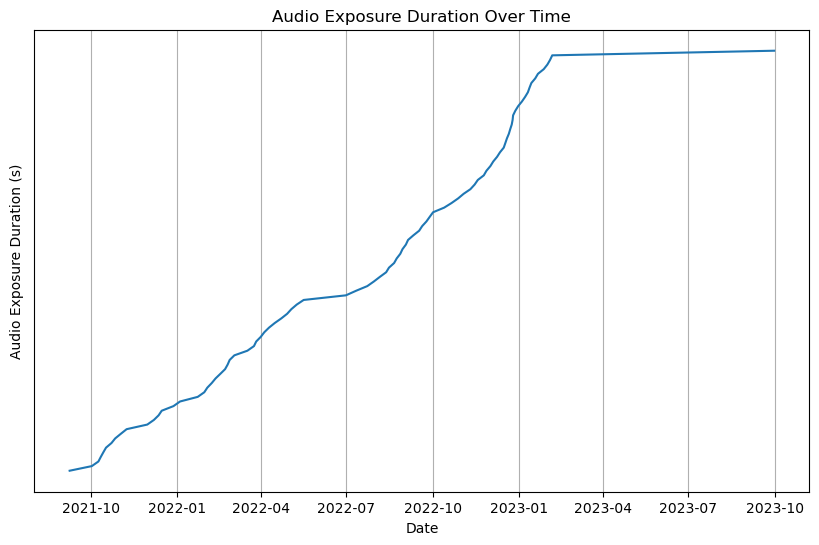

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'head_df'
head_df['startDate'] = pd.to_datetime(head_df['startDate'])
head_df['endDate'] = pd.to_datetime(head_df['endDate'])

plt.figure(figsize=(10, 6))
plt.plot(head_df['startDate'], head_df['HKMetadataKeyAudioExposureDuration'])

# Set static y-axis ticks
plt.yticks([])

plt.title('Audio Exposure Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Audio Exposure Duration (s)')
plt.grid(True)
plt.show()


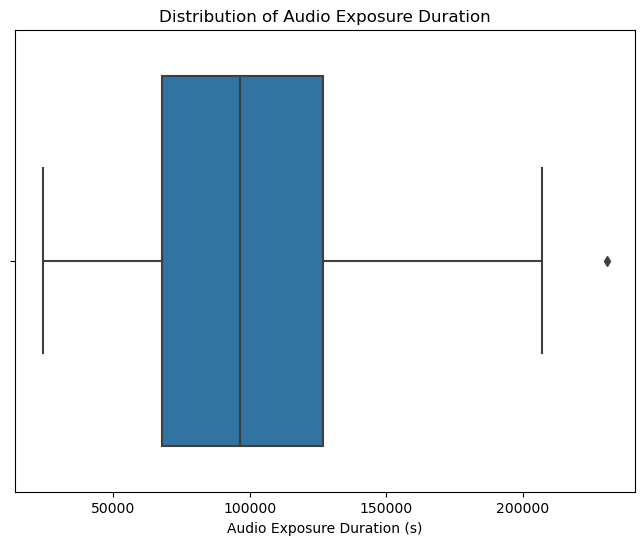

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the duration column to numeric (assuming it contains strings)
head_df['HKMetadataKeyAudioExposureDuration'] = pd.to_numeric(head_df['HKMetadataKeyAudioExposureDuration'].str.rstrip(' s'), errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(x=head_df['HKMetadataKeyAudioExposureDuration'])
plt.title('Distribution of Audio Exposure Duration')
plt.xlabel('Audio Exposure Duration (s)')
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Assuming your data is in a file named 'stepcount.csv'
file_path = 'energy.csv'

# Read the CSV file with appropriate data types and low_memory=False
energy = pd.read_csv(file_path, header=1, usecols=[5, 6, 7, 8])
display(head_df)

startDate                   endDate           value  \
0  2021-09-08 15:01:04+00:00 2021-09-15 15:03:49+00:00  momentaryLimit   
1  2021-10-02 06:37:53+00:00 2021-10-09 07:30:24+00:00  momentaryLimit   
2  2021-10-09 07:30:24+00:00 2021-10-11 21:10:33+00:00  momentaryLimit   
3  2021-10-11 21:10:33+00:00 2021-10-14 14:25:37+00:00  momentaryLimit   
4  2021-10-14 14:25:37+00:00 2021-10-17 10:53:29+00:00  momentaryLimit   
..                       ...                       ...             ...   
87 2023-01-27 12:49:11+00:00 2023-01-31 10:31:13+00:00  momentaryLimit   
88 2023-01-31 10:31:13+00:00 2023-02-03 06:56:06+00:00  momentaryLimit   
89 2023-02-03 06:56:06+00:00 2023-02-05 14:56:11+00:00  momentaryLimit   
90 2023-02-05 14:56:11+00:00 2023-02-08 08:30:28+00:00  momentaryLimit   
91 2023-09-30 11:26:27+00:00 2023-10-07 12:16:53+00:00  momentaryLimit   

    HKMetadataKeyAudioExposureDuration  
0                              97578.3  
1                             123958.0  
2                              67793.7  
3                              53983.4  
4                              78401.9  
..                                 ...  
87                             91959.6  
88                             67778.1  
89                             58953.9  
90                             71884.7  
91                            119490.0  

[92 rows x 4 columns]

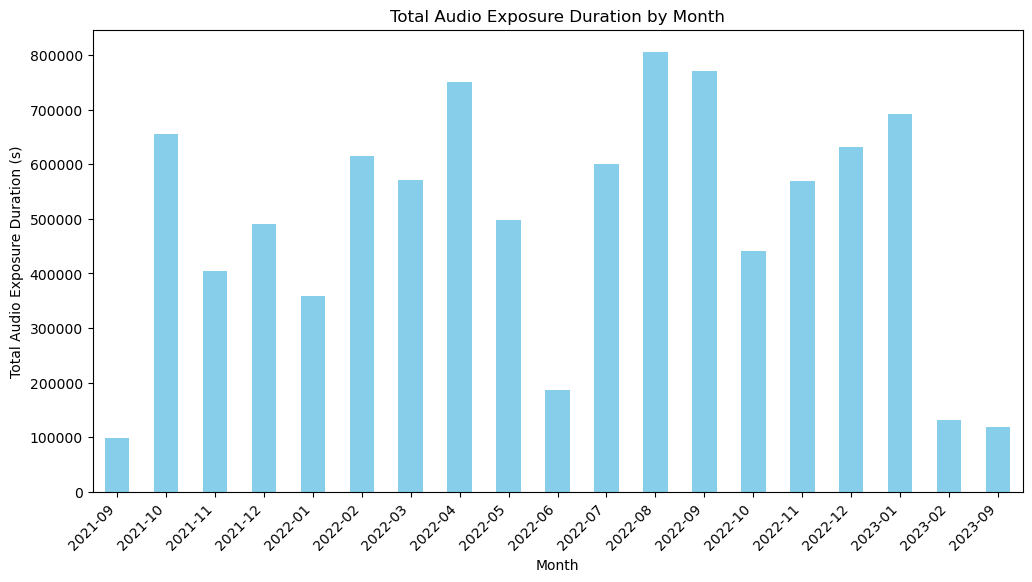

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'head_df'
head_df['startDate'] = pd.to_datetime(head_df['startDate'])
head_df['endDate'] = pd.to_datetime(head_df['endDate'])

# Extract month from the 'startDate'
head_df['Month'] = head_df['startDate'].dt.strftime('%Y-%m')

# Group data by month and sum the 'HKMetadataKeyAudioExposureDuration'
monthly_data = head_df.groupby('Month')['HKMetadataKeyAudioExposureDuration'].sum()

# Plot a bar chart
plt.figure(figsize=(12, 6))
monthly_data.plot(kind='bar', color='skyblue')
plt.title('Total Audio Exposure Duration by Month')
plt.xlabel('Month')
plt.ylabel('Total Audio Exposure Duration (s)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


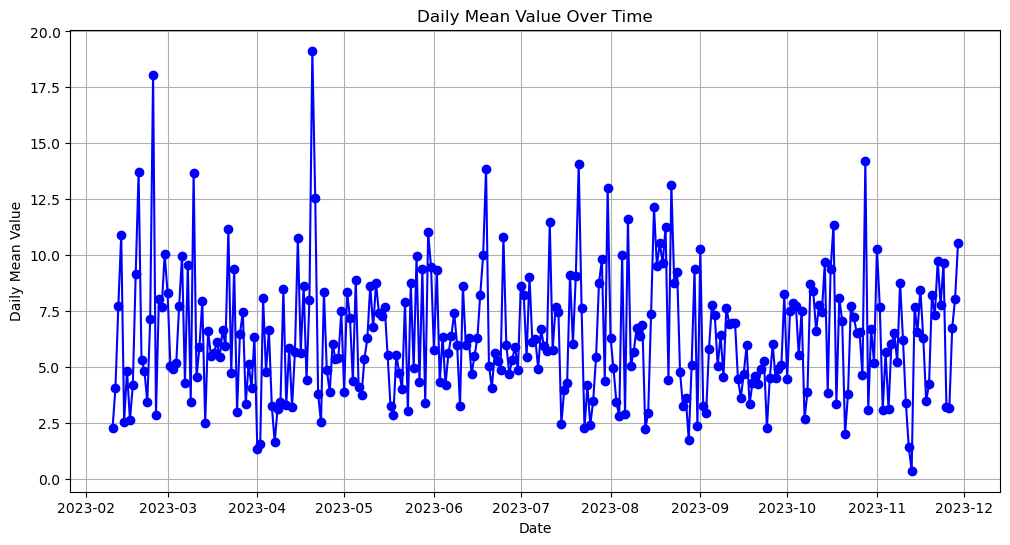

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Assuming your data is in a DataFrame named 'df'
energy['startDate'] = pd.to_datetime(energy['startDate'])
energy['endDate'] = pd.to_datetime(energy['endDate'])

# Replace "#####" values with NaN
energy['value'] = pd.to_numeric(energy['value'], errors='coerce')

# Use SimpleImputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')
energy['value'] = imputer.fit_transform(energy['value'].values.reshape(-1, 1))

# Now, you can use the cleaned 'value' column for plotting
daily_mean = energy.resample('D', on='startDate').mean()

# Plotting a line chart for the daily mean 'value' over time
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['value'], marker='o', linestyle='-', color='b')
plt.title('Daily Mean Value Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Mean Value')
plt.grid(True)
plt.show()


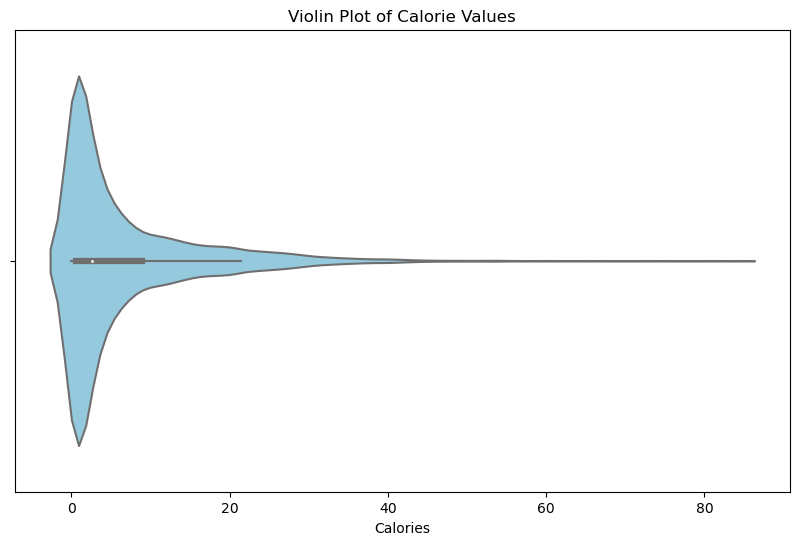

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x=energy['value'], color='skyblue')
plt.title('Violin Plot of Calorie Values')
plt.xlabel('Calories')
plt.show()


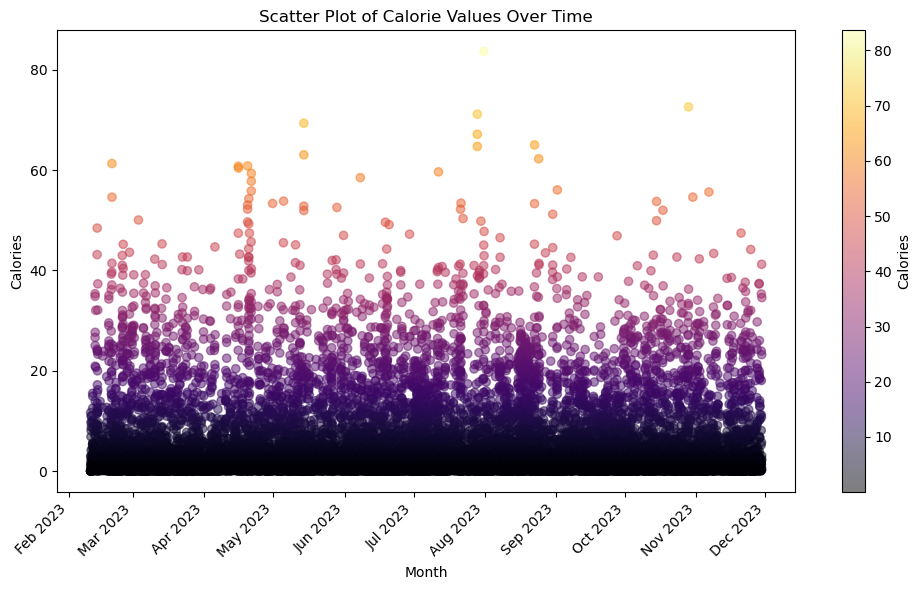

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
scatter = plt.scatter(energy['startDate'], energy['value'], c=energy['value'], cmap='inferno', alpha=0.5)

plt.title('Scatter Plot of Calorie Values Over Time')
plt.xlabel('Month')
plt.ylabel('Calories')

# Add a colorbar to show the intensity of values
cbar = plt.colorbar(scatter)
cbar.set_label('Calories')

# Format x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Abbreviated month name and year

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


In [ ]:
heatmap_data = energy.pivot_table(index='unit', columns='startDate', values='value', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', cbar_kws={'label': 'Calories'})
plt.title('Heatmap of Calorie Values by Unit and Time')
plt.show()
